# –ê—Ç—Ç–µ—Å—Ç–∞—Ü–∏—è

## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atanaskanev/sqlite-sakila-sample-database")

print("Path to dataset files:", path)

/home/maksim/develops/python/MAKSIM/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/maksim/.cache/kagglehub/datasets/atanaskanev/sqlite-sakila-sample-database/versions/1


#### –ò–º–ø–æ—Ä—Ç—ã

In [2]:
import sqlite3
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
from psycopg2 import sql

from sqlalchemy.orm import sessionmaker
from database import engine
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px


#### –°–æ–∑–¥–∞–Ω–∏–µ –±–∞–∑—ã –¥–∞–Ω–Ω—ã—Ö "sakila"

In [ ]:

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ–¥–∫–ª—é—á–µ–Ω–∏—è
pg_user = "postgres"
pg_password = "postgres"
pg_host = "localhost"
pg_port = "5432"
pg_dbname = "sakila"

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Å–æ–µ–¥–∏–Ω–µ–Ω–∏–µ —Å PostgreSQL (–∫ –±–∞–∑–µ –¥–∞–Ω–Ω—ã—Ö postgres)
conn = psycopg2.connect(
    dbname="postgres",  # –ü–æ–¥–∫–ª—é—á–∞–µ–º—Å—è –∫ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–π –±–∞–∑–µ –¥–∞–Ω–Ω—ã—Ö postgres
    user=pg_user,
    password=pg_password,
    host=pg_host,
    port=pg_port
)

# –°–æ–∑–¥–∞–µ–º –∫—É—Ä—Å–æ—Ä
cursor = conn.cursor()

conn.autocommit = True

# –°–æ–∑–¥–∞–µ–º –±–∞–∑—É –¥–∞–Ω–Ω—ã—Ö sakila
cursor.execute(sql.SQL("CREATE DATABASE {}").format(sql.Identifier('sakila')))

# –ó–∞–∫—Ä—ã–≤–∞–µ–º –∫—É—Ä—Å–æ—Ä –∏ —Å–æ–µ–¥–∏–Ω–µ–Ω–∏–µ
cursor.close()
conn.close()

print("–ë–∞–∑–∞ –¥–∞–Ω–Ω—ã—Ö 'sakila' —É—Å–ø–µ—à–Ω–æ —Å–æ–∑–¥–∞–Ω–∞.")


–ë–∞–∑–∞ –¥–∞–Ω–Ω—ã—Ö 'sakila' —É—Å–ø–µ—à–Ω–æ —Å–æ–∑–¥–∞–Ω–∞.


#### –ü–µ—Ä–µ–Ω–æ—Å –¥–∞–Ω–Ω—ã—Ö –∏–∑ sqlite –≤ Postgresql "sakila" 

In [7]:

# –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –∫ SQLite
sqlite_db_path = "sakila.db"  # –ü—É—Ç—å –∫ —Å–∫–∞—á–∞–Ω–Ω–æ–π SQLite –±–∞–∑–µ
sqlite_conn = sqlite3.connect(sqlite_db_path)

pg_engine = create_engine(f"postgresql://{pg_user}:{pg_password}@{pg_host}:{pg_port}/{pg_dbname}")

# –ü–æ–ª—É—á–µ–Ω–∏–µ —Å–ø–∏—Å–∫–∞ —Ç–∞–±–ª–∏—Ü –∏–∑ SQLite
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, sqlite_conn)

# –ü–µ—Ä–µ–Ω–æ—Å –¥–∞–Ω–Ω—ã—Ö –∏–∑ –∫–∞–∂–¥–æ–π —Ç–∞–±–ª–∏—Ü—ã
for table_name in tables["name"]:
    df = pd.read_sql(f"SELECT * FROM {table_name}", sqlite_conn)
    df.to_sql(table_name, pg_engine, if_exists="replace", index=False)
    print(f"–¢–∞–±–ª–∏—Ü–∞ {table_name} —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.")

# –ó–∞–∫—Ä—ã–≤–∞–µ–º —Å–æ–µ–¥–∏–Ω–µ–Ω–∏—è
sqlite_conn.close()
print("–ü–µ—Ä–µ–Ω–æ—Å –∑–∞–≤–µ—Ä—à—ë–Ω!")


–¢–∞–±–ª–∏—Ü–∞ actor —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ country —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ city —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ address —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ language —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ category —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ customer —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ film —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ film_actor —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ film_category —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ film_text —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ inventory —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ staff —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ store —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ payment —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–¢–∞–±–ª–∏—Ü–∞ rental —É—Å–ø–µ—à–Ω–æ –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–∞.
–ü–µ—Ä–µ–Ω–æ—Å –∑–∞–≤–µ—Ä—à—ë–Ω!


## –ó–∞–¥–∞—á–∞ 2 –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –∫ –ë–î –∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞–ø—Ä–æ—Å–æ–≤

In [3]:
# –°–æ–∑–¥–∞—ë–º –ø–∞–ø–∫—É "output"
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)


In [4]:
# –°–æ–∑–¥–∞–Ω–∏–µ —Å–µ—Å—Å–∏–∏
Session = sessionmaker(bind=engine)
session = Session()


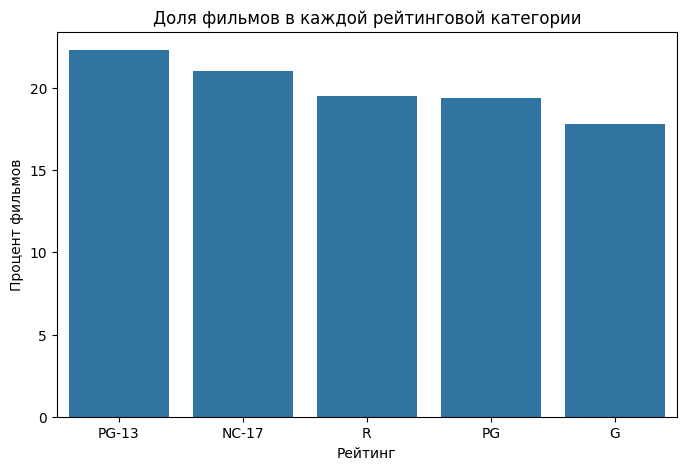

In [5]:

# 1 –î–æ–ª—è —Ñ–∏–ª—å–º–æ–≤ –≤ –∫–∞–∂–¥–æ–π —Ä–µ–π—Ç–∏–Ω–≥–æ–≤–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
query_1 = """
SELECT rating, COUNT(*) * 100.0 / (SELECT COUNT(*) FROM film) AS percentage
FROM film
GROUP BY rating
ORDER BY percentage DESC;
"""
df_1 = pd.read_sql(query_1, engine)
df_1.to_csv("output/films_by_rating.csv", index=False)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(8, 5))
sns.barplot(x=df_1["rating"], y=df_1["percentage"])
plt.title("–î–æ–ª—è —Ñ–∏–ª—å–º–æ–≤ –≤ –∫–∞–∂–¥–æ–π —Ä–µ–π—Ç–∏–Ω–≥–æ–≤–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏")
plt.ylabel("–ü—Ä–æ—Ü–µ–Ω—Ç —Ñ–∏–ª—å–º–æ–≤")
plt.xlabel("–†–µ–π—Ç–∏–Ω–≥")
plt.savefig("output/films_by_rating.png")
plt.show()

/tmp/ipykernel_21771/1178054635.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_2["rentals"], y=df_2["name"], palette="viridis")


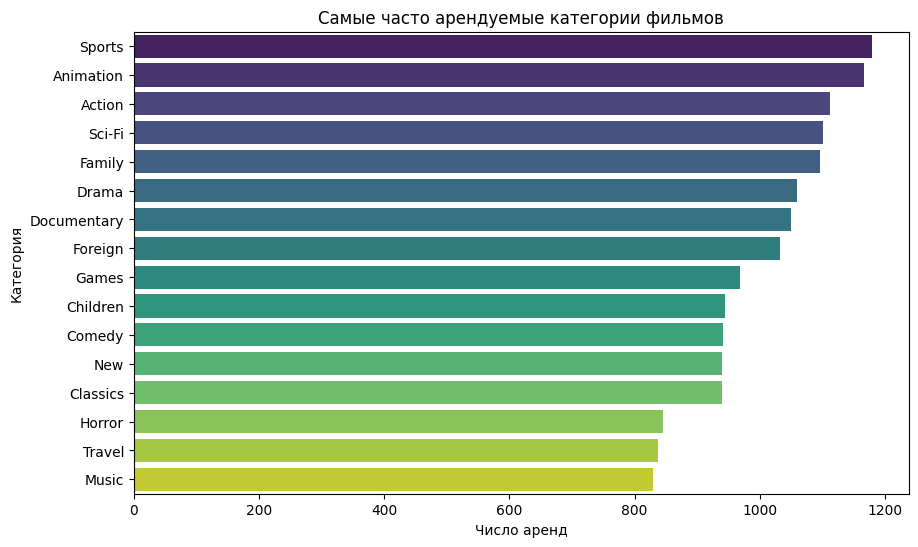

In [24]:
# 2  –ö–∞–∫–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ñ–∏–ª—å–º–æ–≤ —á–∞—â–µ –∞—Ä–µ–Ω–¥—É—é—Ç—Å—è?
query_2 = """
SELECT c.name, COUNT(r.rental_id) AS rentals
FROM rental r
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
GROUP BY c.name
ORDER BY rentals DESC;
"""
df_2 = pd.read_sql(query_2, engine)
df_2.to_csv("output/top_rented_categories.csv", index=False)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(10, 6))
sns.barplot(x=df_2["rentals"], y=df_2["name"], palette="viridis")
plt.title("–°–∞–º—ã–µ —á–∞—Å—Ç–æ –∞—Ä–µ–Ω–¥—É–µ–º—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ñ–∏–ª—å–º–æ–≤")
plt.xlabel("–ß–∏—Å–ª–æ –∞—Ä–µ–Ω–¥")
plt.ylabel("–ö–∞—Ç–µ–≥–æ—Ä–∏—è")
plt.savefig("output/top_rented_categories.png")
plt.show()

/tmp/ipykernel_21771/1370291913.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_3["avg_rental_duration"], y=df_3["name"], palette="coolwarm")


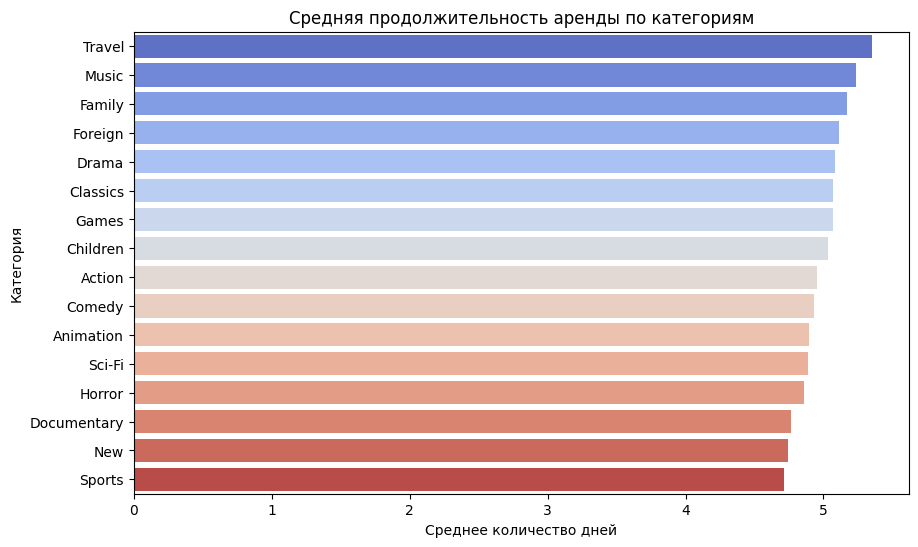

In [ ]:

# 3Ô∏è –°—Ä–µ–¥–Ω—è—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∞—Ä–µ–Ω–¥—ã –¥–ª—è –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
query_3 = """
SELECT c.name, AVG(f.rental_duration) AS avg_rental_duration
FROM film f
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
GROUP BY c.name
ORDER BY avg_rental_duration DESC;
"""
df_3 = pd.read_sql(query_3, engine)
df_3.to_csv("output/avg_rental_duration.csv", index=False)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(10, 6))
sns.barplot(x=df_3["avg_rental_duration"], y=df_3["name"], palette="coolwarm")
plt.title("–°—Ä–µ–¥–Ω—è—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∞—Ä–µ–Ω–¥—ã –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º")
plt.xlabel("–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π")
plt.ylabel("–ö–∞—Ç–µ–≥–æ—Ä–∏—è")
plt.savefig("output/avg_rental_duration.png")
plt.show()



/tmp/ipykernel_21771/650071940.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("output/monthly_rental_revenue.png")
/home/maksim/develops/python/MAKSIM/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


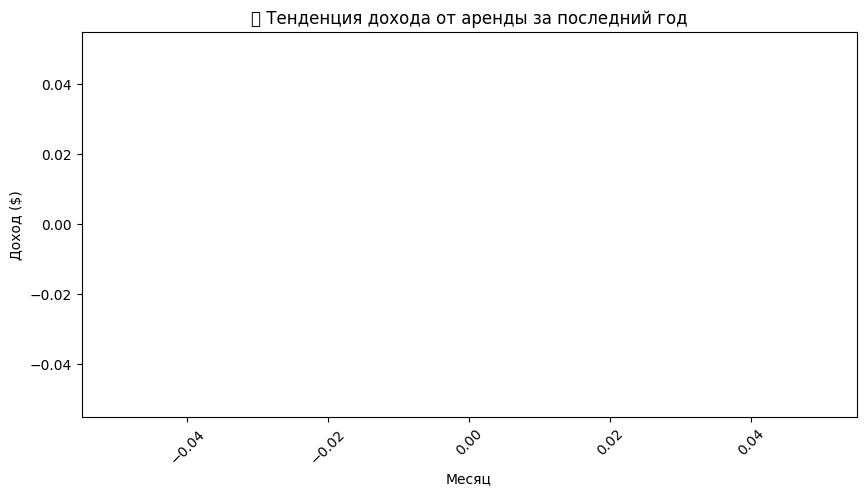

In [26]:
# 4 –¢–µ–Ω–¥–µ–Ω—Ü–∏–∏ –∑–∞ –µ–∂–µ–º–µ—Å—è—á–Ω—ã–π –¥–æ—Ö–æ–¥ –æ—Ç –ø—Ä–æ–¥–∞–∂ –∑–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–π –≥–æ–¥
query_4 = """
SELECT DATE_TRUNC('month', payment_date) AS month, SUM(amount) AS revenue
FROM payment
WHERE payment_date >= NOW() - INTERVAL '1 year'
GROUP BY month
ORDER BY month;
"""
df_4 = pd.read_sql(query_4, engine)
df_4.to_csv("output/monthly_rental_revenue.csv", index=False)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ç—Ä–µ–Ω–¥–∞ –¥–æ—Ö–æ–¥–æ–≤ –ø–æ –º–µ—Å—è—Ü–∞–º
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_4, x="month", y="revenue", marker="o")
plt.title("üìä –¢–µ–Ω–¥–µ–Ω—Ü–∏—è –¥–æ—Ö–æ–¥–∞ –æ—Ç –∞—Ä–µ–Ω–¥—ã –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥")
plt.xlabel("–ú–µ—Å—è—Ü")
plt.ylabel("–î–æ—Ö–æ–¥ ($)")
plt.xticks(rotation=45)
plt.savefig("output/monthly_rental_revenue.png")
plt.show()


In [6]:
import plotly.express as px
import pandas as pd

# SQL-–∑–∞–ø—Ä–æ—Å: —Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂ –ø–æ –º–∞–≥–∞–∑–∏–Ω–∞–º
query_5 = """
SELECT s.store_id, SUM(p.amount) AS total_sales
FROM payment p
JOIN rental r ON p.rental_id = r.rental_id
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN store s ON i.store_id = s.store_id
GROUP BY s.store_id
ORDER BY total_sales DESC;
"""

# –í—ã–ø–æ–ª–Ω—è–µ–º –∑–∞–ø—Ä–æ—Å
df_5 = pd.read_sql(query_5, engine)
df_5.to_csv("output/sales_by_store.csv", index=False)

# –°–æ–∑–¥–∞—ë–º –∫—Ä—É–≥–æ–≤—É—é –¥–∏–∞–≥—Ä–∞–º–º—É
fig = px.pie(
    df_5,
    values="total_sales",
    names="store_id",
    title="–î–æ–ª—è –ø—Ä–æ–¥–∞–∂ –ø–æ –º–∞–≥–∞–∑–∏–Ω–∞–º",
    hole=0.2,  # –î–µ–ª–∞–µ–º –ø–æ–Ω—á–∏–∫-–¥–∏–∞–≥—Ä–∞–º–º—É
    color_discrete_sequence=px.colors.sequential.RdBu,  # –ö—Ä–∞—Å–∏–≤–æ —Ä–∞—Å–∫—Ä–∞—à–∏–≤–∞–µ–º
    width=800,
    height=600
)

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∏ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ
fig.write_html("output/sales_by_store_piechart.html")  # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤ HTML
fig.show()


/tmp/ipykernel_21771/4063285897.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_6, x="avg_replacement_cost", y="name", palette="viridis")
/tmp/ipykernel_21771/4063285897.py:18: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.savefig("output/avg_replacement_cost_by_genre.png")
/home/maksim/develops/python/MAKSIM/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


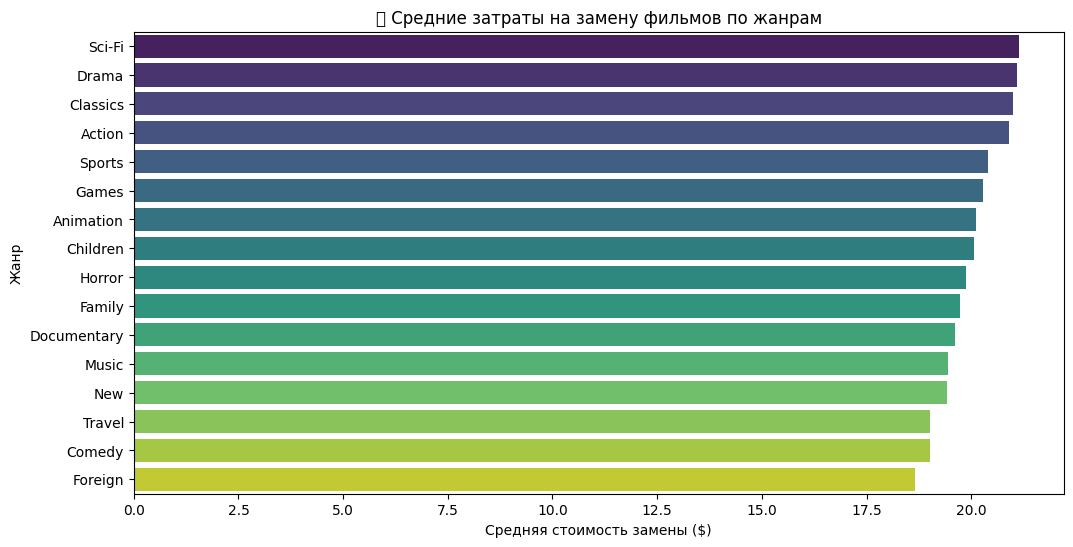

In [28]:
# 6 –°—Ç–æ–∏–º–æ—Å—Ç—å –∑–∞–º–µ–Ω—ã —Ñ–∏–ª—å–º–∞
query_6 = """
SELECT c.name, AVG(f.replacement_cost) AS avg_replacement_cost
FROM film f
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
GROUP BY c.name
ORDER BY avg_replacement_cost DESC;
"""
df_6 = pd.read_sql(query_6, engine)
df_6.to_csv("output/avg_replacement_cost_by_genre.csv", index=False)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∑–∞–º–µ–Ω—ã —Ñ–∏–ª—å–º–æ–≤
plt.figure(figsize=(12, 6))
sns.barplot(data=df_6, x="avg_replacement_cost", y="name", palette="viridis")
plt.title("–°—Ä–µ–¥–Ω–∏–µ –∑–∞—Ç—Ä–∞—Ç—ã –Ω–∞ –∑–∞–º–µ–Ω—É —Ñ–∏–ª—å–º–æ–≤ –ø–æ –∂–∞–Ω—Ä–∞–º")
plt.xlabel("–°—Ä–µ–¥–Ω—è—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –∑–∞–º–µ–Ω—ã ($)")
plt.ylabel("–ñ–∞–Ω—Ä")
plt.savefig("output/avg_replacement_cost_by_genre.png")
plt.show()


In [7]:


# SQL-–∑–∞–ø—Ä–æ—Å: —Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∂–∞–Ω—Ä–æ–≤ –¥–ª—è –≤—Å–µ—Ö –∞–∫—Ç–µ—Ä–æ–≤
query_7 = """
SELECT a.actor_id, a.first_name, a.last_name, COUNT(DISTINCT c.category_id) AS unique_genres
FROM actor a
JOIN film_actor fa ON a.actor_id = fa.actor_id
JOIN film_category fc ON fa.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
GROUP BY a.actor_id, a.first_name, a.last_name
ORDER BY unique_genres DESC;
"""

# –í—ã–ø–æ–ª–Ω—è–µ–º –∑–∞–ø—Ä–æ—Å –∏ —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≤ DataFrame
df_7 = pd.read_sql(query_7, engine)
df_7["actor_name"] = df_7["first_name"] + " " + df_7["last_name"]
df_7.to_csv("output/all_actors_by_genres.csv", index=False)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫—Ä—É–≥–æ–≤–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã —Å Plotly**
fig = px.pie(
    df_7,
    values="unique_genres",
    names="actor_name",
    title=" –í—Å–µ –∞–∫—Ç—ë—Ä—ã, —Å–Ω–∏–º–∞—é—â–∏–µ—Å—è –≤ —Ä–∞–∑–Ω—ã—Ö –∂–∞–Ω—Ä–∞—Ö",
    hole=0.2,  # –î–µ–ª–∞–µ–º –¥–∏–∞–≥—Ä–∞–º–º—É "–ø–æ–Ω—á–∏–∫–æ–º"
    color_discrete_sequence=px.colors.sequential.Plasma_r,
    width=1000,  # –®–∏—Ä–∏–Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞
    height=800   # –í—ã—Å–æ—Ç–∞ –≥—Ä–∞—Ñ–∏–∫–∞
)

# # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∏ –ø–æ–∫–∞–∑ –≥—Ä–∞—Ñ–∏–∫–∞
fig.write_image("output/actors_by_genres_piechart_all.png")
fig.show()


In [8]:
df_7 = df_7.head(40) 
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫—Ä—É–≥–æ–≤–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã —Å —É–≤–µ–ª–∏—á–µ–Ω–Ω—ã–º —Ä–∞–∑–º–µ—Ä–æ–º
fig = px.pie(
    df_7,
    values="unique_genres",
    names="actor_name",
    title=" –¢–æ–ø-40 –∞–∫—Ç—ë—Ä–æ–≤ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∂–∞–Ω—Ä–æ–≤ —Ñ–∏–ª—å–º–æ–≤",
    hole=0.2,  # –î–µ–ª–∞–µ–º –¥–∏–∞–≥—Ä–∞–º–º—É "–ø–æ–Ω—á–∏–∫–æ–º"
    color_discrete_sequence=px.colors.sequential.Plasma_r,
    width=1200,  # –®–∏—Ä–∏–Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞
    height=800   # –í—ã—Å–æ—Ç–∞ –≥—Ä–∞—Ñ–∏–∫–∞
)
fig.write_html("output/actors_by_genres_piechart.html")
fig.show()


## –ó–∞–¥–∞—á–∞ 3. –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö